# Introduction to Altair

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python. Altair offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics.

By *declarative*, we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. The key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.

Altair is based on [Vega-Lite](https://vega.github.io/vega-lite/), a high-level grammar of interactive graphics. Altair provides a friendly Python [API (Application Programming Interface)](https://en.wikipedia.org/wiki/Application_programming_interface) that generates Vega-Lite specifications in [JSON (JavaScript Object Notation)](https://en.wikipedia.org/wiki/JSON) format. Environments such as Jupyter Notebooks, JupyterLab, and Colab can then take this specification and render it directly in the web browser. To learn more about the motivation and basic concepts behind Altair and Vega-Lite, watch the [Vega-Lite presentation video from OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4).

This notebook will guide you through the basic process of creating visualizations in Altair. First, you will need to make sure you have the Altair package and its dependencies installed (for more, see the [Altair installation documentation](https://altair-viz.github.io/getting_started/installation.html)), or you are using a notebook environment that includes the dependencies pre-installed.

_This notebook is part of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

## Imports

To start, we must import the necessary libraries: Pandas for data frames and Altair for visualization.

In [2]:
import pandas as pd
import altair as alt

## Renderers

Depending on your programming environment, you may need to specify a particular [renderer](https://altair-viz.github.io/user_guide/renderers.html) for Altair.

* If you are using __JupyterLab__, __Google Colab__, or __nteract__ you should not need to do anything (the correct renderer will be enabled by default).
* If you are using __Jupyter Notebook__, you need to enable the notebook renderer (below).


In [3]:
# use this line if you are in a Jupyter Notebook (not JupyterLab) environment
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Data

Data in Altair is built around the Pandas data frame, which consists of a set of named data *columns*. We will also regularly refer to data columns as data *fields*.

When using Altair, datasets are commonly provided as data frames. Alternatively, Altair can also accept a URL to load a network-accessible dataset. As we will see, the named columns of the data frame are an essential piece of plotting with Altair.

We will often use datasets from the [vega-datasets](https://github.com/vega/vega-datasets) repository. Some of these datasets are directly available as Pandas data frames:

In [5]:
from vega_datasets import data  # import vega_datasets
cars = data.cars()              # load cars data as a Pandas data frame
cars.head()                     # display the first five rows

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Datasets in the vega-datasets collection can also be accessed via URLs:

In [7]:
data.cars.url

'https://vega.github.io/vega-datasets/data/cars.json'

Dataset URLs can be passed directly to Altair (for supported formats like JSON and [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)), or loaded into a Pandas data frame like so:

In [8]:
pd.read_json(data.cars.url).head() # load JSON data into a data frame

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


For more information about data frames - and some useful transformations to prepare Pandas data frames for plotting with Altair! - see the [Specifying Data with Altair documentation](https://altair-viz.github.io/user_guide/data.html).

### Weather Data

Statistical visualization in Altair begins with ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) data frames. Here, we'll start by creating a simple data frame (`df`) containing the average precipitation (`precip`) for a given `city` and `month` :

In [10]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## The Chart Object

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument:

In [11]:
chart = alt.Chart(df)

In [12]:
chart

SchemaValidationError: Invalid specification

        altair.vegalite.v2.api.Chart, validating 'required'

        'mark' is a required property
        

Chart({
  data:        city month  precip
  0   Seattle   Apr    2.68
  1   Seattle   Aug    0.87
  2   Seattle   Dec    5.31
  3  New York   Apr    3.94
  4  New York   Aug    4.13
  5  New York   Dec    3.58
  6   Chicago   Apr    3.62
  7   Chicago   Aug    3.98
  8   Chicago   Dec    2.56
})

So far, we have defined the `Chart` object and passed it the simple data frame we generated above. We have not yet told the chart to *do* anything with the data.

## Marks and Encodings

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `Chart.mark_point()`:

In [13]:
alt.Chart(df).mark_point()

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `city` of the data using the `y` channel, which represents the y-axis position of the points. To specify this, use the `encode` method:


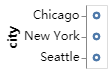

In [14]:
alt.Chart(df).mark_point().encode(
  y='city',
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding an `x` encoding channel, mapped to the `'precip'` field:

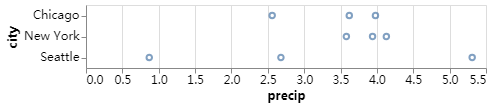

In [15]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

_Seattle exhibits both the least-rainiest and most-rainiest months!_

The data type of the `'precip'` field is again automatically inferred by Altair, and this time is treated as a *quantitative* type (that is, a real-valued number). We see that grid lines and appropriate axis titles are automatically added as well.

Above we have specified key-value pairs using keyword arguments (`x='precip'`). In addition, Altair provides construction methods for encoding definitions, using the syntax `alt.X('precip')`. This alternative is useful for providing more parameters to an encoding, as we will see later in this notebook.



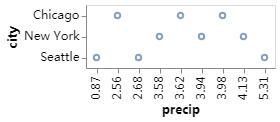

In [20]:
alt.Chart(df).mark_point().encode(
    alt.X('precip:N'),
    alt.Y('city')
)

The two styles of specifying encodings can be interleaved: `x='precip', alt.Y('city')` is also a valid input to the `encode` function.

In the examples above, the data type for each field is inferred automatically based on its type within the Pandas data frame. We can also explicitly indicate the data type to Altair by annotating the field name:

- `'b:N'` indicates a *nominal* type (unordered, categorical data),
- `'b:O'` indicates an *ordinal* type (rank-ordered data),
- `'b:Q'` indicates a *quantitative* type (numerical data with meaningful magnitudes), and
- `'b:T'` indicates a *temporal* type (date/time data)

Explicit annotation of data types is necessary when data is loaded from an external URL directly by Vega-Lite (skipping Pandas entirely), or when we wish to use a type that differs from the type that was automatically inferred.

What do you think will happen to our chart above if we treat `precip` as a nominal or ordinal variable, rather than a quantitative variable? _Modify the code above and find out!_

We will take a closer look at data types and encoding channels in the next notebook.

## Data Transformation: Aggregation

To allow for more flexibility in how data are visualized, Altair has a built-in syntax for *aggregation* of data. For example, we can compute the average of all values by specifying an aggregation function along with the field name:

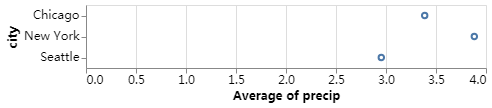

In [21]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

Now within each x-axis category, we see a single point reflecting the *average* of the values within that category.

_Does Seattle really have the lowest average precipitation of these cities? (It does!) Still, how might this plot mislead? Which months are included? What counts as precipitation?_

Altair supports a variety of aggregation functions, including `count`, `min` (minimum), `max` (maximum), `average`, `median`, and `stdev` (standard deviation). In a later notebook, we will take a tour of data transformations, including aggregation, sorting, filtering, and creation of new derived fields using calculation formulas.

## Changing the Mark Type

Let's say we want to represent our aggregated values using rectangular bars rather than circular points. We can do this by replacing `Chart.mark_point` with `Chart.mark_bar`:

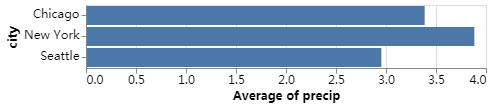

In [24]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

Because the nominal field `a` is mapped to the `y`-axis, the result is a horizontal bar chart. To get a vertical bar chart, we can simply swap the `x` and `y` keywords:

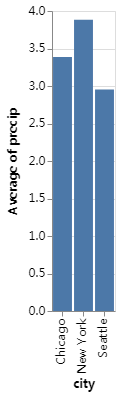

In [25]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

## Customizing a Visualization

By default Altair / Vega-Lite make some choices about properties of the visualization, but these can be changed using methods to customize the look of the visualization. For example, we can specify the axis titles using the `axis` attribute of channel classes, we can modify scale properties using the `scale` attribute, and we can specify the color of the marking by setting the `color` keyword of the `Chart.mark_*` methods to any valid [CSS color string](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value):

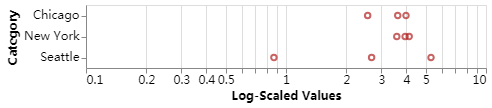

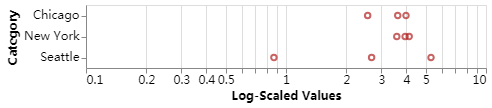

In [27]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

A subsequent module will explore the various options available for scales, axes, and legends to create customized charts.

## Multiple Views

As we've seen above, the Altair `Chart` object represents a plot with a single mark type. What about more complicated diagrams, involving multiple charts or layers? Using a set of *view composition* operators, Altair can take multiple chart definitions and combine them to create more complex views.

As a starting point, let's plot the cars dataset in a line chart showing the average mileage by the year of manufacture:

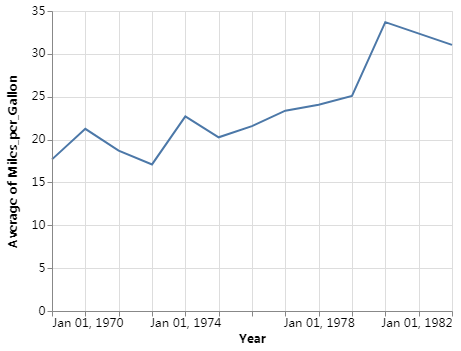

In [28]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

To augment this plot, we might like to add `circle` marks for each averaged data point. (The `circle` mark is just a convenient shorthand for `point` marks that used filled circles.)

We can start by defining each chart separately: first a line plot, then a scatter plot. We can then use the `layer` operator to combine the two into a layered chart. Here we use the shorthand `+` (plus) operator to invoke layering:

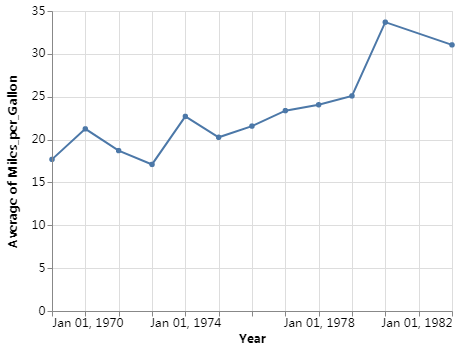

In [29]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

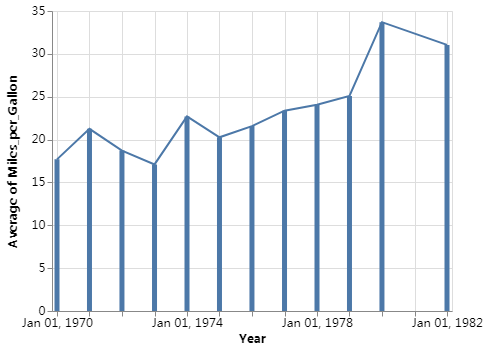

In [41]:
line+line.mark_bar()

We can also create this chart by *reusing* and *modifying* a previous chart definition! Rather than completely re-write a chart, we can start with the line chart, then invoke the `mark_point` method to generate a new chart definition with a different mark type:

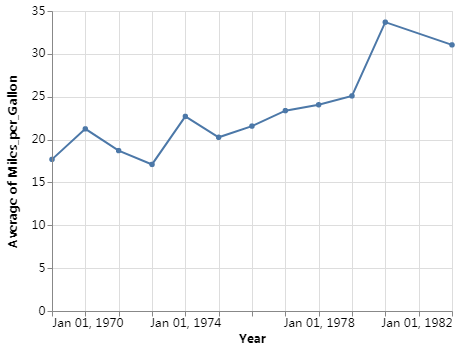

In [42]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

mpg + mpg.mark_circle()

<em>(The need to place points on lines is so common, the `line` mark also includes a shorthand to generate a new layer for you. Trying adding the argument `point=True` to the `mark_line` method!)</em>

Now, what if we'd like to see this chart alongside other plots, such as the average horsepower over time?

We can use *concatenation* operators to place multiple charts side-by-side, either vertically or horizontally. Here, we'll use the `|` (pipe) operator to perform horizontal concatenation of two charts:

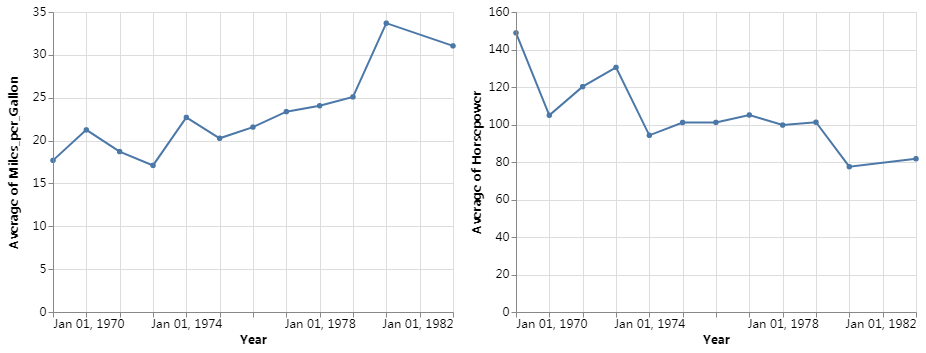

In [45]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Horsepower)')
)

(mpg + mpg.mark_circle()) | (hp + hp.mark_circle())

_We can see that, in this dataset, over the 1970s and early '80s the average fuel efficiency improved while the average horsepower decreased._

A later notebook will focus on *view composition*, including not only layering and concatenation, but also the `facet` operator for splitting data into sub-plots and the `repeat` operator to concisely generate concatenated charts from a template.

## Interactivity

In addition to basic plotting and view composition, one of Altair and Vega-Lite's most exciting features is its support for interaction.

To create a simple interactive plot that supports panning and zooming, we can invoke the `interactive()` method of the `Chart` object. In the chart below, click and drag to *pan* or use the scroll wheel to *zoom*:

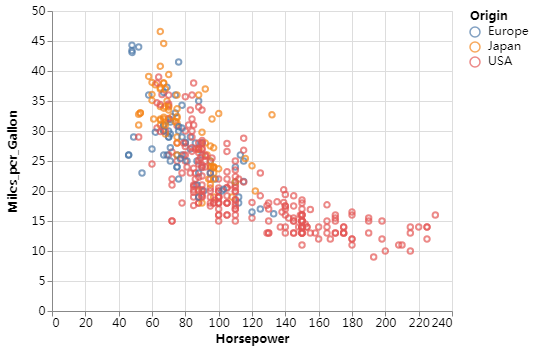

In [46]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

To provide more details upon mouse hover, we can use the `tooltip` encoding channel:

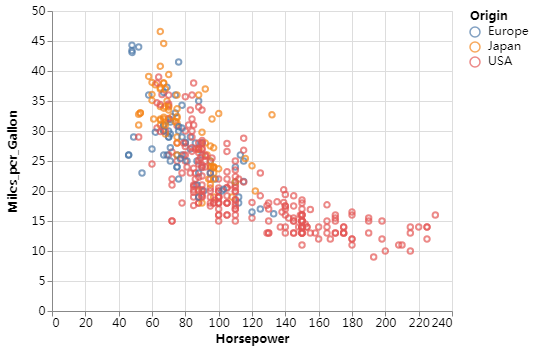

In [47]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin'] # show Name and Origin in a tooltip
).interactive()

For more complex interactions, such as linked charts and cross-filtering, Altair provides a *selection* abstraction for defining interactive selections and then binding them to components of a chart. We will cover this is in detail in a later notebook.

Below is a more complex example. The upper histogram shows the count of cars per year and  uses an interactive selection to modify the opacity of points in the lower scatter plot, which shows horsepower versus mileage.

_Drag out an interval in the upper chart and see how it affects the points in the lower chart. As you examine the code, **don't worry if parts don't make sense yet!** This is an aspirational example, and we will fill in all the needed details over the course of the different notebooks._

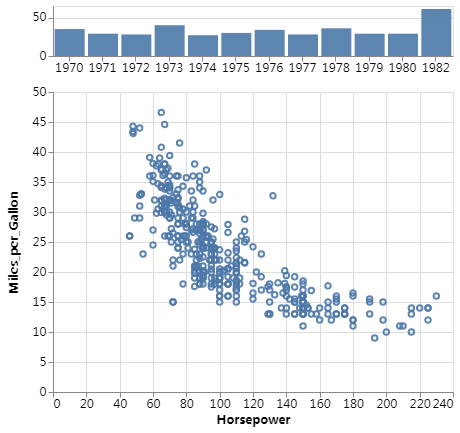

In [49]:
# create an interval selection over an x-axis encoding
brush = alt.selection_interval(encodings=['x'])

# determine opacity based on brush
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# an overview histogram of cars per year
# add the interval brush to select cars over time
overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year',   # extract year unit, treat as ordinal
      scale=alt.Scale(rangeStep=None), # subbdivide the full default chart width
      axis=alt.Axis(title=None, labelAngle=0) # no title, no label angle
    ),
    alt.Y('count()', title=None), # counts, no axis title
    opacity=opacity
).add_selection(
    brush     # add interval brush selection to the chart
).properties(
    height=50 # set the default chart height to 50 pixels
)

# a detail scatterplot of horsepower vs. mileage
# modulate point opacity based on the brush selection
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    # set opacity based on brush selection
    opacity=opacity
)

# vertically concatenate (vconcat) charts using the '&' operator
overview & detail

## Aside: Examining the JSON Output

As a Python API to Vega-Lite, Altair's main purpose is to convert plot specifications to a JSON string that conforms to the Vega-Lite schema. Using the `Chart.to_json` method, we can inspect the JSON specification that Altair is exporting and sending to Vega-Lite:

In [50]:
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-fdfbb22e8e0e89f6556d8a3b434b0c97"
  },
  "datasets": {
    "data-fdfbb22e8e0e89f6556d8a3b434b0c97": [
      {
        "city": "Seattle",
        "month": "Apr",
        "precip": 2.68
      },
      {
        "city": "Seattle",
        "month": "Aug",
        "precip": 0.87
      },
      {
        "city": "Seattle",
        "month": "Dec",
        "precip": 5.31
      },
      {
        "city": "New York",
        "month": "Apr",
        "precip": 3.94
      },
      {
        "city": "New York",
        "month": "Aug",
        "precip": 4.13
      },
      {
        "city": "New York",
        "month": "Dec",
        "precip": 3.58
      },
      {
        "city": "Chicago",
        "month": "Apr",
        "precip": 3.62
      },
      {
        "city": "Chicago",
        "month": "Aug",
        "precip": 3.

Notice here that `encode(x='average(precip)')` has been expanded to a JSON structure with a `field` name, a `type` for the data, and includes an `aggregate` field. The `encode(y='city')` statement has been expanded similarly.

As we saw earlier, Altair's shorthand syntax includes a way to specify the type of the field as well:

In [51]:
x = alt.X('average(precip):Q')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


This short-hand is equivalent to spelling-out the attributes by name:

In [25]:
x = alt.X(aggregate='average', field='precip', type='quantitative')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


## Publishing a Visualization

Once you have visualized your data, perhaps you would like to publish it somewhere on the web. This can be done straightforwardly using the [vega-embed JavaScript package](https://github.com/vega/vega-embed). A simple example of a stand-alone HTML document can be generated for any chart using the `Chart.save` method:

```python
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
chart.save('chart.html')
```


The basic HTML template produces output that looks like this, where the JSON specification for your plot produced by `Chart.to_json` should be stored in the `spec` JavaScript variable:

```html
<!DOCTYPE html>
<html>
  <head>
    <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@3"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@4"></script>
  </head>
  <body>
    <div id="vis"></div>
    <script type="text/javascript">
    var spec = {};  /* JSON output for your chart's specification */
    var opt = {"renderer": "canvas", "actions": false};  /* Options for the embedding */
    vegaEmbed("#vis", spec, opt);
    </script>
  </body>
</html>
 ```

The `Chart.save` method provides a convenient way to save such HTML output to file. For more information on embedding Altair/Vega-Lite, see the [documentation of the vega-embed project](https://github.com/vega/vega-embed).


## Next Steps

🎉 Hooray, you've completed the introduction to Altair! In the next notebook, we will dive deeper into creating visualizations using Altair's model of data types, graphical marks, and visual encoding channels.